In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/machine learning/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file_path)
print("📊 Dataset Preview:")
print(df.head())


📊 Dataset Preview:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Tra

In [4]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Encode categorical columns
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)


SVC()

In [7]:
y_pred = svm_rbf.predict(X_test)
print("\n📈 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))



📈 Confusion Matrix:
 [[49  7  0  0  0  0  0]
 [18 21  0  0  0 20  3]
 [ 0  0 26  7 21  1 23]
 [ 0  0  5 24 29  0  0]
 [ 0  0  0  0 63  0  0]
 [ 2 14  0  0  0 27 13]
 [ 0  2  9  0  0 10 29]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.88      0.78        56
           1       0.48      0.34      0.40        62
           2       0.65      0.33      0.44        78
           3       0.77      0.41      0.54        58
           4       0.56      1.00      0.72        63
           5       0.47      0.48      0.47        56
           6       0.43      0.58      0.49        50

    accuracy                           0.57       423
   macro avg       0.58      0.57      0.55       423
weighted avg       0.59      0.57      0.54       423



In [8]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for k in kernels:
    model = SVC(kernel=k, C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, pred, average='weighted', zero_division=0)
    results[k] = [acc, prec, rec, f1]
    print(f"\n{k.upper()} Kernel -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")



LINEAR Kernel -> Accuracy: 0.8865, Precision: 0.8906, Recall: 0.8865, F1: 0.8830

POLY Kernel -> Accuracy: 0.5721, Precision: 0.5895, Recall: 0.5721, F1: 0.5565

RBF Kernel -> Accuracy: 0.5650, Precision: 0.5851, Recall: 0.5650, F1: 0.5445

SIGMOID Kernel -> Accuracy: 0.0355, Precision: 0.1372, Recall: 0.0355, F1: 0.0297


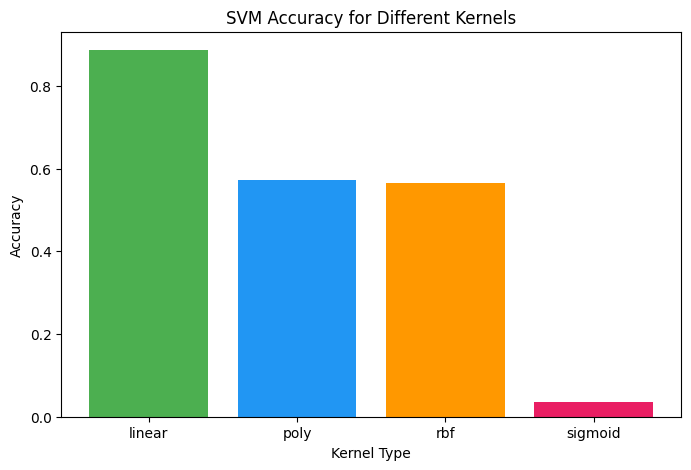

In [9]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), [results[k][0] for k in results.keys()],
        color=['#4CAF50','#2196F3','#FF9800','#E91E63'])
plt.title('SVM Accuracy for Different Kernels')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.show()

In [10]:
cv_results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in kernels:
    model = SVC(kernel=k, C=1.0, gamma='scale')
    acc = cross_val_score(model, X, y, cv=kf, scoring='accuracy').mean()
    prec = cross_val_score(model, X, y, cv=kf, scoring='precision_weighted').mean()
    rec = cross_val_score(model, X, y, cv=kf, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted').mean()
    cv_results[k] = [acc, prec, rec, f1]

print("\n🔁 5-Fold Cross-Validation Results:")
for k, v in cv_results.items():
    print(f"{k} -> Accuracy: {v[0]:.4f}, Precision: {v[1]:.4f}, Recall: {v[2]:.4f}, F1: {v[3]:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


🔁 5-Fold Cross-Validation Results:
linear -> Accuracy: 0.8787, Precision: 0.8810, Recall: 0.8787, F1: 0.8765
poly -> Accuracy: 0.5974, Precision: 0.6097, Recall: 0.5974, F1: 0.5865
rbf -> Accuracy: 0.5609, Precision: 0.5783, Recall: 0.5609, F1: 0.5506
sigmoid -> Accuracy: 0.0303, Precision: 0.0985, Recall: 0.0303, F1: 0.0164


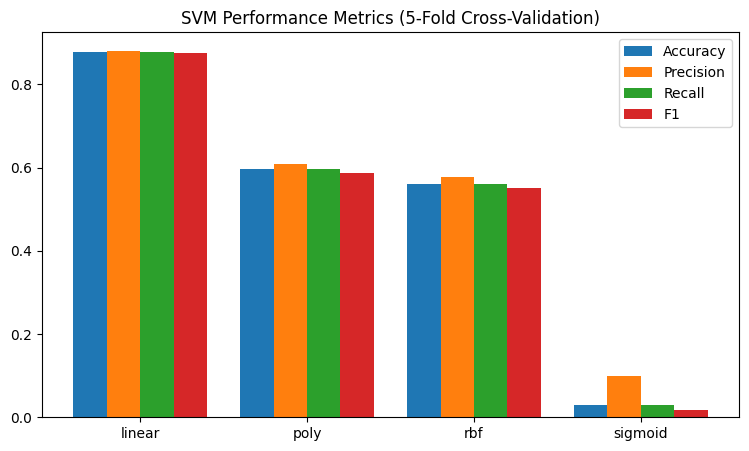

In [11]:
x = np.arange(len(kernels))
width = 0.2
plt.figure(figsize=(9,5))
plt.bar(x-0.3, [cv_results[k][0] for k in kernels], width, label='Accuracy')
plt.bar(x-0.1, [cv_results[k][1] for k in kernels], width, label='Precision')
plt.bar(x+0.1, [cv_results[k][2] for k in kernels], width, label='Recall')
plt.bar(x+0.3, [cv_results[k][3] for k in kernels], width, label='F1')
plt.xticks(x, kernels)
plt.title('SVM Performance Metrics (5-Fold Cross-Validation)')
plt.legend()
plt.show()

In [12]:
print("\nFirst 5 Support Vector Indices (RBF):")
print(svm_rbf.support_[:5])
print("\nFirst 5 Support Vectors (RBF):\n")
print(svm_rbf.support_vectors_[:5])


First 5 Support Vector Indices (RBF):
[ 9 59 67 93 99]

First 5 Support Vectors (RBF):

[[ 0.       22.99368   1.741377 54.877111  1.        1.        3.
   3.        1.        0.        2.009796  0.        2.        0.071317
   3.        3.      ]
 [ 1.       17.405104  1.82525  58.913579  1.        1.        2.580872
   3.887906  2.        0.        2.        0.        2.        0.453649
   3.        0.      ]
 [ 0.       21.478496  1.686936 51.256059  1.        1.        3.
   3.179995  1.        0.        1.910378  0.        0.480614  0.625079
   3.        3.      ]
 [ 1.       18.128249  1.699437 52.08657   1.        1.        2.853513
   3.        2.        0.        2.        0.        0.680464  1.258881
   2.        3.      ]
 [ 1.       17.469417  1.798645 59.612717  1.        1.        2.336044
   4.        2.        0.        2.        0.        2.        0.133005
   3.        0.      ]]
